In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff
import math

### Cambio de tasas 

In [2]:
#m es la capitalización de la tasa origen
#j es la capitalización de la tasa nueva
def nominal(i,m,j):
    e=((1+(i/m))**m)-1
    c=m*np.log(1+(i/m))
    n=((1+(i/m))**(m/j)-1)*j
    print(f"La tasa nominal capitalizable {m} al año inicial es de {i}")
    print(f"La tasa equivalente efectiva es de {e}" )
    print(f"La tasa equivalente continua es de {c}" )
    print(f"La tasa equivalente nominal capitalizable {j} al año es de {n}" )

In [3]:
#m es la capitalización
def continua(i,m):
    n=(np.exp(i/m)-1)*m
    e=np.exp(i)-1
    print(f"La tasa continua inicial es de {i}")
    print(f"La tasa equivalente nominal capitalizable {m} al año es de {n}" )
    print(f"La tasa equivalente efectiva es de {e}" )

In [4]:
#m es la capitalización
def efectiva(i,m):
    n=((1+i)**(1/m)-1)*m
    c=np.log(1+i)
    print(f"La tasa efectiva inicial es de {i}")
    print(f"La tasa equivalente nominal es de {n}" )
    print(f"La tasa equivalente continua es de {c}" )

### Cambio de tasas una por una

In [5]:
def efectiva_continua(i):
    c=np.log(1+i)
    return c

In [6]:
# m es la capitalización que queremos
def efectiva_nominal(i,m):
    n=((1+i)**(1/m)-1)*m
    return n

In [7]:
efectiva_nominal(.16,2)

0.1540659228538015

In [2]:
# m es la capitalización de la tasa
def nominal_efectiva(i,m):
    e=((1+(i/m))**m)-1
    return e

In [10]:
i1 = nominal_efectiva(.10,12)

In [9]:
# m es la capitalización de la tasa
def nominal_continua(i,m):
    c=m*np.log(1+(i/m))
    return c

In [10]:
# m es la capitalización de la tasa que tenemos
# j es la capitalización que queremos
def nominal_nominal(i,m,j):
    n=((1+(i/m))**(m/j)-1)*j
    return n

In [11]:
nominal_nominal(.08,1,360/182)

0.07847785250747387

In [12]:
def continua_nominal(i,m):
    n=(np.exp(i/m)-1)*m
    return n

In [13]:
def continua_efectiva(i):
    e=np.exp(i)-1
    return e

### VP y VF de tasas

In [14]:
#i tasa efectiva
#n periodos
# R Pago
# Calculo del valor presente de una cantidad
def vp_efectiva(i,n,R):
    e=R*(1+i)**(-n)
    return e

In [9]:
#i tasa efectiva
#n periodos
# R Pago
# Calculo del valor futuro de una cantidad
def vf_efectiva(i,n,R):
    e=R*(1+i)**(n)
    return e

In [16]:
vf_efectiva(.05,2,100)

110.25

In [17]:
#i tasa nominal
#n periodos
#m capitalización
# R Pago
# Calculo del valor futuro de una cantidad
def vf_nominal(i,n,m,R):
    e=R*(1+i/m)**(n*m)
    return e

In [18]:
#i tasa nominal
#n periodos
#m capitalización
# R Pago
# Calculo del valor presente de una cantidad
def vp_nominal(i,n,m,R):
    e=R*(1+i/m)**(-n*m)
    return e

In [19]:
#i tasa continua
#n periodos
# R Pago
# Calculo del valor presente de una cantidad
def vp_continua(i,n,R):
    e=R*np.exp(-n*i)
    return e

In [20]:
#i tasa continua
#n periodos
# R Pago
# Calculo del valor futuro de una cantidad
def vf_continua(i,n,R):
    e=R*np.exp(n*i)
    return e

In [21]:
vf_continua(0.048790,2,100)

110.24996380064619

In [22]:
vf_continua(.07,2,100000)-100000

15027.379885722738

### VP y VF de anualidades vencidas

In [23]:
# La tasa de interés debe ir respecto a cuando son los pagos, por ejemplo, si R se paga cada 6 meses se debe escoger una tasa semestral.
# Si R es una vez cada año, la i es efectiva
# Si R se paga cada tres meses, y tenemos i efectiva, hacemos la equivalencia de i capitalizable 4 veces al año

In [24]:
# m cada cuanto se paga la anualidad
# R Renta
# i tasa 
# Calculo del valor presente de una anualidad
def valor_presente_v(i,R,m):
    a=R*((1-((1+i)**(-m)))/i)
    return a

In [25]:
# m cada cuanto se paga la anualidad
# R Renta
# i tasa 
# Calculo del valor futuro de una anualidad
def valor_futuro_v(i,R,m):
    s=R*(((1+i)**m)-1)/i
    return s

### VP y VF de anualidades anticipadas

In [4]:
def valor_presente_a(i,R,m):
    a=R*((1-((1+i)**(-m)))/i)*(1 + i)
    return a

In [7]:
s = 300000*(1.04)**40
s

1440306.188380997

In [8]:
valor_presente_a(0.0435,s,25)

22634348.95743636

In [14]:
#i tasa efectiva
#n periodos
# R Pago
# Calculo del valor futuro de una cantidad
#vf_efectiva(i,n,R):
x = 0.04415
s25 = 300
k = x*s25
vf_efectiva(i1,k,39)

145.849222502493

In [15]:
x = 0.04415
s26 = 300*(1.04)
k = x*s26
vf_efectiva(i1,k,39)

153.75091136894986

In [5]:
def valor_futuro_a(i,R,m):
    s=(1 + i)*R*(((1+i)**m)-1)/i
    return s

### Calculo de periodos de las tasas


In [28]:
#Donde i esta como tasa efectiva
# vp valor presente
# vf valor futuro
# Calculo de n, n esta en períodos
def tiempoe(vp,vf,i):
    n=(np.log(vf/vp))/(np.log(1+i))
    return n

In [29]:
#Donde i esta como tasa nominal
# vp valor presente
# vf valor futuro
# m capitalización de la tasa i
# Calculo de n, n esta en períodos
def tiempon(vp,vf,i,m):
    n=(np.log(vf/vp))/(m*np.log((1+i/m)))
    return n

In [30]:
#Donde i esta como tasa continua
# vp valor presente
# vf valor futuro
# Calculo de n, n esta en períodos
def tiempoc(vp,vf,i):
    n=(np.log(vf/vp))/i

### Calculo de tasas con VF


In [31]:
#v es el VF
#n la maduración
#R monto
# Calculo de la tasa efectiva
def i_efecvf(v,n,R):
    i=((v/R)**(1/n))-1
    return i


In [32]:
#R monto
#v es el VF
#n la maduración
#m la capitalización de la tasa
# Calculo de la tasa nominal, capitalizable m veces al año
def i_nominalvf(v,n,m,R):
    i=(((v/R)**(1/(n*m)))-1)*m
    return i
    

In [33]:
#v es el VF
#n la maduración
#R monto
# Calculo de la tasa continua
def i_contvf(v,n,R):
    i=(np.log(v/R))/n
    return i


In [34]:
i_contvf(141.906755,5,100)

0.07000000019826298

### Calculo de tasas con VP

In [35]:
#v es el VP
#n la maduración
#R monto
# Calculo de la tasa efectiva
def i_efecvp(v,n,R):
    i=((v/R)**(-1/n))-1
    return i


In [36]:
#R monto
#v es el VP
#n la maduración
#m la capitalización de la tasa
# Calculo de la tasa nominal, capitalizable m veces al año
def i_nominalvp(v,n,m,R):
    i=(((v/R)**(-1/(n*m)))-1)*m
    return i
    

In [37]:
#v es el VP
#n la maduración
#R monto
# Calculo de la tasa continua
def i_contvf(v,n,R):
    i=-(np.log(v/R))/n
    return i


### BONOS

In [38]:
# SOLO ES PARA EJERCICIOS DE CONVENCIÓN 360
#N nominal
#c tasa cupón
#m capitalización tasa cupón
#n madurez
#r YTM (Debe de estar convertido a la misma capitalización que c, ejemplo: efectiva_nominal(.08,360/28))
#l capitalización del YTM
#a la convención (360)


def precio_bono_act(N,c,m,n,r,l,a):
    YTM=nominal_nominal(r,l,a/m)
    P=N*(c*m/a)*((1-(1+YTM*m/a)**(-n/m)))/(YTM*m/a)+N*(1+YTM*m/a)**(-n/m)
    return P

In [39]:
precio_bono_act(100,.055,182,1077,.08,1,360)

93.8474114000718

In [40]:
#Precio cupón cero
#N nominal
#n madurez
#r YTM anual
def precio_cupcero(N,n,r):
    P=N/((1+(r))**(n))
    return P

In [41]:
precio_cupcero(10,28/360,0.115)

9.915692857705169

In [42]:
#YTM dee un bono cupón cero anual
#P precio
#N nominal 
#n madurez

def r_cupcero(P,N,n):
    r=((P/N)**(-1/n))-1
    return r

In [43]:
#N nominal
#c tasa cupón
#l capitalización tasa cupón
#n madurez
#r YTM
#m capitalización YTM


#P>N. c>r  Sobre par
#P<N. c<r  Bajo par
#P=N. c=r  A la par

def precio_bono(N,c,l,n,r,m):
    YTM=round(nominal_nominal(r,m,l),6)
    P=N*(c/l)*((1-(1+YTM/l)**(-n*l)))/(YTM/l)+N*(1+YTM/l)**(-n*l)
    return P


In [44]:
round(nominal_nominal(0.09,1,1),4)

0.09

In [45]:
precio_bono(100,0.090,1,8,0.11,1)

89.70775447814583

### Bonos en fecha cupón


In [46]:
#N nominal
#c tasa cupón
#m capitalización tasa cupón
#n madurez
#r YTM
#l capitalización YTM
def bonos_fec(N,c,m,n,r,l):
    
    vec_ft=[N*c/m]*(n*m-1)+[N*c/m+N]
    bono=[]
    t=np.arange(1,n*m+1)
    ytm=nominal_nominal(r,l,m)
    for i in range(n*m):
        bono.append(vec_ft[i]/(ytm/m)*(1-(1+ytm/m)**(-(m*n-t[i])))+(N*(1+ytm/m)**(-(m*n-t[i]))))

    return bono
    

### CETES

In [53]:
# Tiempo de un CETE
#P precio
#N nominal
#r YTM anual

def t_cete(P,N,r):
    t=((N/P)-1)*(360/r)
    return t

In [54]:
t_cete(9.464,10,.112)

182.04323149378095

In [55]:
#Precio de un cete
#N nominal
#n madurez
#r YTM anual
def precio_cete(N,n,r):
    P=N/(1+(r*n/360))
    return P

In [56]:
precio_cete(10,182.04323149378095,.112)

9.464

In [57]:
10-9.9147114488478


0.08528855115219969

In [58]:
#Tasa de descuento de un CETE
#r YTM
#n madurez (t/360)

def descete(r,n):
    b=r/(1+r*n)
    return b

In [59]:
#Precio de un CETE con la tasa de descuento
#N nominal
#b tasa descuento
#n madurez

def precio_cete_des(N,b,n):
    P=N*(1-b*n)
    return P

In [60]:
#YTM de un CETE
#P precio
#N nominal (10)
#n madurez

def r_cete(P,N,n):
    r=((N/P)-1)/(n/360)
    return r

In [61]:
r_cete(9.9767,10,28)

0.03002710601415564

### DM y Convexidad


In [62]:
#N nominal
#c tasa cupón
#m capitalización YTM
#n madurez
#r YTM
#l capitalización tasa cupón
# h cambios en los pbs (es un vector)

def DM_Conv(N,c,m,n,r,l,h, bono_num=7):
    
    ytm=nominal_nominal(r,m,l)
    P=precio_bono(N,c,l,n,r,m)
    DM=-(N*c*n/(ytm*(1 + ytm/l)*(1 + ytm/l)**(l*n)) - N*c*(1 - 1/(1 + ytm/l)**(l*n))/ytm**2 - N*n/((1 + ytm/l)*(1 + ytm/l)**(l*n)))/P
    Conv = -(N*c*n**2/(ytm*(1 + ytm/l)**2*(1 + ytm/l)**(l*n)) + 2*N*c*n/(ytm**2*(1 + ytm/l)*(1 + ytm/l)**(l*n)) - 2*N*c*(1 - 1/(1 + ytm/l)**(l*n))/ytm**3 + N*c*n/(l*ytm*(1 + ytm/l)**2*(1 + ytm/l)**(l*n)) - N*n**2/((1 + ytm/l)**2*(1 + ytm/l)**(l*n)) - N*n/(l*(1 + ytm/l)**2*(1 + ytm/l)**(l*n)))/P
    print(f"El precio del bono {bono_num} es de {P}")
    print(f"La DM del bono {bono_num} es de {DM}")
    print(f"La convexidad del bono {bono_num} es de {Conv}")
    
    for i in h:
        
        Pesos=-(i/10000)*P*DM
        porcen=-(i/10000)*DM
        npre=P*(1-i/10000*DM)
    
        cpesos=-P*(i/10000)*DM+((i/10000)**2/2)*P*Conv
        nupre=P-(i/10000)*DM*P+((i/10000)**2)/2*P*Conv
        campor=-(i/10000)*DM+((i/10000)**2)/2*Conv

        # Nuevo precio calculado con DM y Convexidad menos precio original
        Q=nupre-P
        

        print()
        print("Utilizando solo DM")
        print(f"El cambio por {i} pb en pesos del bono {bono_num} es ${Pesos}")
        print(f"El cambio porcentual por {i} pb del bono {bono_num} es {porcen:.5%}")
        print(f"El nuevo precio aproximado por {i} pb del bono {bono_num} es ${npre}")
    
        print()
        print("Utilizando la DM y la convexidad")
        print(f"El cambio por {i} pb en pesos del bono {bono_num} es ${cpesos}")
        print(f"El cambio porcentual por {i} pb del bono {bono_num} es {campor:.5%}")
        print(f"El nuevo precio aproximado por {i} pb del bono {bono_num} es ${nupre}")
        print(f"La diferencia de precios es de {Q}")
        

In [63]:
#N nominal
#c tasa cupón
#m capitalización YTM
#n madurez
#r YTM
#l capitalización tasa cupón
# h cambios en los pbs (es un vector)

# Los puntos base siempre se ponen como vector

DM_Conv(100, 0.1, 2, 3, 0.08, 2,[10], 1)

El precio del bono 1 es de 105.24213685674636
La DM del bono 1 es de 2.5715908631243596
La convexidad del bono 1 es de 8.312289993451753

Utilizando solo DM
El cambio por 10 pb en pesos del bono 1 es $-0.27063971755649235
El cambio porcentual por 10 pb del bono 1 es -0.25716%
El nuevo precio aproximado por 10 pb del bono 1 es $104.97149713918986

Utilizando la DM y la convexidad
El cambio por 10 pb en pesos del bono 1 es $-0.27020231597595046
El cambio porcentual por 10 pb del bono 1 es -0.25674%
El nuevo precio aproximado por 10 pb del bono 1 es $104.9719345407704
La diferencia de precios es de -0.27020231597595057


In [64]:
# Define los símbolos
c, l, N, ytm, n = symbols('c l N ytm n')

# Define la función P
DM=(N*c*n/(ytm*(1 + ytm/l)*(1 + ytm/l)**(l*n)) - N*c*(1 - 1/(1 + ytm/l)**(l*n))/ytm**2 - N*n/((1 + ytm/l)*(1 + ytm/l)**(l*n)))
# Calcula la primera derivada de P con respecto a ytm
derivada = diff(DM, ytm)

# Imprime la primera derivada
print("La primera derivada de P con respecto a ytm es:")
print(derivada)

La primera derivada de P con respecto a ytm es:
-N*c*n**2/(ytm*(1 + ytm/l)**2*(1 + ytm/l)**(l*n)) - 2*N*c*n/(ytm**2*(1 + ytm/l)*(1 + ytm/l)**(l*n)) + 2*N*c*(1 - 1/(1 + ytm/l)**(l*n))/ytm**3 - N*c*n/(l*ytm*(1 + ytm/l)**2*(1 + ytm/l)**(l*n)) + N*n**2/((1 + ytm/l)**2*(1 + ytm/l)**(l*n)) + N*n/(l*(1 + ytm/l)**2*(1 + ytm/l)**(l*n))


### DM y Convexidad conjunta de bonos


In [65]:
# Método de Hedging
# Precio del Portafolio para a lo más 5 instrumentos
# Ai (instrumento i) = [Precio, veces_Ai, DM, Convexidad]

A1 = [97.45258330901021,12,3.527925411204608,15.904227609790128] #Bono 5
A2 = [95.24754254726872,15,4.825008385519628,32.091542950032576] #Bono 6
A3 = [93.98047473498784,16,6.140864733495677,51.212171762369536] #Bono 7
A4 = [97.27362924684098,18,3.6087649779109126,16.444133616524155] #Bono 8
A5 = [0,0,0,0]

Precio_Portafolio = (A1[0]*A1[1])+(A2[0]*A2[1])+(A3[0]*A3[1])+(A4[0]*A4[1])+(A5[0]*A5[1])
print("El precio de tu portafolio conjunto es de: $",Precio_Portafolio)

DM_Portafolio = (((A1[0]*A1[1])/Precio_Portafolio)*A1[2])+(((A2[0]*A2[1])/Precio_Portafolio)*A2[2])+(((A3[0]*A3[1])/Precio_Portafolio)*A3[2])+(((A4[0]*A4[1])/Precio_Portafolio)*A4[2])+(((A5[0]*A5[1])/Precio_Portafolio)*A5[2])
print("La DM de tu portafolio conjunto es de: $",DM_Portafolio)

Convex_Portafolio = (((A1[0]*A1[1])/Precio_Portafolio)*A1[3])+(((A2[0]*A2[1])/Precio_Portafolio)*A2[3])+(((A3[0]*A3[1])/Precio_Portafolio)*A3[3])+(((A4[0]*A4[1])/Precio_Portafolio)*A4[3])+(((A5[0]*A5[1])/Precio_Portafolio)*A5[3])
print("La Convexidad de tu portafolio conjunto es de: $",Convex_Portafolio)

El precio de tu portafolio conjunto es de: $ 5852.757060120097
La DM de tu portafolio conjunto es de: $ 4.540054894459877
La Convexidad de tu portafolio conjunto es de: $ 29.088523841702504


In [172]:
#Duración modificada y convexidad conjunta de los bonos

print("¿Cuántos bonos pondrás en el portafolio?")
a=float(input())

if a==2:
    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    P=n1*P1+n2*P2
    c1=n1*P1/P
    c2=n2*P2/P
    DMP=c1*DM1+c2*DM2
    ConvP=c1*Conv1+c2*Conv2
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")
    
elif a==3:

    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    
    print("Dame el número del tercer bono a utilizar")
    n3=float(input())
    print("Dame el precio del tercer bono")
    P3=float(input())
    print("Dame la DM del tercer bono")
    DM3=float(input())
    print("Dame la convexidad del tercer bono")
    Conv3=float(input())

    
    P=n1*P1+n2*P2+n3*P3
    c1=n1*P1/P
    c2=n2*P2/P
    c3=n3*P3/P
    DMP=c1*DM1+c2*DM2+c3*DM3
    ConvP=c1*Conv1+c2*Conv2+c3*Conv3
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")
    
elif a==4:


    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    
    print("Dame el número del tercer bono a utilizar")
    n3=float(input())
    print("Dame el precio del tercer bono")
    P3=float(input())
    print("Dame la DM del tercer bono")
    DM3=float(input())
    print("Dame la convexidad del tercer bono")
    Conv3=float(input())

    print("Dame el número del cuarto bono a utilizar")
    n4=float(input())
    print("Dame el precio del cuarto bono")
    P4=float(input())
    print("Dame la DM del cuarto bono")
    DM4=float(input())
    print("Dame la convexidad del cuarto bono")
    Conv4=float(input())

    P=n1*P1+n2*P2+n3*P3+n4*P4
    c1=n1*P1/P
    c2=n2*P2/P
    c3=n3*P3/P
    c4=n4*P4/P
    DMP=c1*DM1+c2*DM2+c3*DM3+c4*DM4
    ConvP=c1*Conv1+c2*Conv2+c3*Conv3+c4*Conv4
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")

¿Cuántos bonos pondrás en el portafolio?


KeyboardInterrupt: Interrupted by user

### Inmunización


In [3]:
print("¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?")
i=float(input())
print("Dame el precio del portafolio a inmunizar")
P=float(input())
print("Dame la DM del portafolio a inmunizar")
DMp=float(input())
print("Dame la Convexidad del portafolio a inmunizar")
Convp=float(input())
print("Dame el cambio de pb")
h=float(input())

G=-P*(h/10000)*DMp+((h/10000)**2/2)*P*Convp


if      i==1: 
        print("Dame el precio del intrumento ")
        Q1=float(input())
        print("Dame la DM del instrumento")
        DMq1=float(input())
        phi_1=(-DMp*P)/(DMq1*Q1)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {-P*(h/10000)*DMp}")
        print()
        print(f"El número del instrumento que necesitas para cubrir el cambio es de {phi_1}")
        print()
        print(f"La ganancia es de {-h/10000*Q1*DMq1}")
        print(f"Si utilizamos {phi_1} del intrumento al multiplicarla por la ganancia nos da {phi_1*(-h/10000*Q1*DMq1)}")
        
elif    i==2: 
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2],[Convq1*Q1,Convq2*Q2],])
        B=[[-DMp*P],[-Convp*P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1}")
        
        
elif    i==3:
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio del tercer intrumento ")
        Q3=float(input())
        print("Dame la DM del tercer instrumento")
        DMq3=float(input())
        print("Dame la Convexidad del tercer instrumento")
        Convq3=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        print("Dame el precio nuevo con los pb del tercer instrumento")
        l3=float(input())
        L3=l3-Q3
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2,DMq3*Q3],[Convq1*Q1,Convq2*Q2,Convq3*Q3],[Q1,Q2,Q3]])
        B=[[-DMp*P],[-Convp*P],[-P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print(f"Número del tercer instrumento que necesitas para cubrir el cambio es de {phi_s[2,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"Si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print(f"Si utilizamos {phi_s[2,0]} del tercer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[2,0]*L3}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1+phi_s[2,0]*L3}")
else:
    print("Revisa que hayas escrito bien")
     

¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?


 1


Dame el precio del portafolio a inmunizar


 328.34


Dame la DM del portafolio a inmunizar


 6.76


Dame la Convexidad del portafolio a inmunizar


 0


Dame el cambio de pb


 10


Dame el precio del intrumento 


 118.79


Dame la DM del instrumento


 5.49



Si tenemos un cambio de 10.0pb perderíamos -2.2195783999999996

El número del instrumento que necesitas para cubrir el cambio es de -3.403441287383055

La ganancia es de -0.6521571
Si utilizamos -3.403441287383055 del intrumento al multiplicarla por la ganancia nos da 2.2195784


Obten las tasas faltantes y comprueba que el valor futuro es el mismo para las tasas equivalentes

In [6]:
efectiva(.05,4)

La tasa efectiva inicial es de 0.05
La tasa equivalente nominal es de 0.04908893771615741
La tasa equivalente continua es de 0.04879016416943205


In [55]:
continua_efectiva(0.07)

0.07250818125421654

In [17]:
monto=[100,100,100]
años=[2,4,7]
capi=[4,2,6]
efec=[0.05,0.10,0.08]
cont=[]
nom=[]
for i in efec:
    cont.append(efectiva_continua(i))
for i in range(len(efec)):
    nom.append(efectiva_nominal(efec[i], capi[i]))

In [30]:
futc=[]
fute=[]
futn=[]
for i in range(3):
    futc.append(vf_continua(cont[i],años[i],monto[i]))
    fute.append(vf_efectiva(efec[i],años[i],monto[i]))
    futn.append(vf_nominal(nom[i],años[i],capi[i],monto[i]))

In [31]:
setlist=list(zip(monto,años,capi,cont,efec,nom,futc,fute,futn))
tasas=pd.DataFrame(setlist,columns=["Monto","Años","Capitalización","Continua","Efectiva","Nominal","VF tasa continua","VF tasa efectiva","VF tasa nominal"])
tasas

,Monto,Años,Capitalización,Continua,Efectiva,Nominal,VF tasa continua,VF tasa efectiva,VF tasa nominal
0,100,2,4,0.048790,0.05,0.049089,110.250000,110.250000,110.250000
1,100,4,2,0.095310,0.10,0.097618,146.410000,146.410000,146.410000
2,100,7,6,0.076961,0.08,0.077457,171.382427,171.382427,171.382427


In [79]:
#José va a recibir el pago de su aguinaldo el cual es de $175,000 y lo quiere invertir en una cuenta que le otorga un interés del 
#15% capitalizable mensualmente, ¿En cuánto tiempo alcanzaría una inversión de $300,000?

tiempon(175000,300000,.15,12)

3.6157216946540904

In [82]:
#¿Cuál es el precio de un bono cupón cero que paga un nominal de $200 dentro de un año bajo un YTM del 11.85% anual? 
precio_bono(200,0,1,1,.1185,1)

178.81090746535537

In [83]:
#¿Cuál es el precio de un bono cupón cero que paga un nominal de $10 dentro de 28 día bajo un YTM del 11.5% anual? 
precio_bono(10,0,1,28/360,.115,1)

9.915692857705169

In [86]:
#Precio de un cete
#N nominal
#r YTM anual
#n madurez
precio_cete(10,28,.115)
 

9.91134849402566

In [87]:
#¿Cuál es el YTM anual de un cete emitido por el banco central con un precio de $9.872 y madurez de 28 días?
r_cete(9.872,10,28)

0.16670525584625973

In [68]:
setlist=list(zip((t:=np.arange(1,9)),bonos_fec(100,.09,1,8,.11,1),bonos_fec(100,.09,1,8,.09,1),bonos_fec(100,.09,1,8,.06,1)))
bonos=pd.DataFrame(setlist,columns=["Periodo","Bono 7","Bono 8","Bono 9"])
bonos

,Periodo,Bono 7,Bono 8,Bono 9
0,1,90.575607,100.0,116.747144
1,2,91.538924,100.0,114.751973
2,3,92.608206,100.0,112.637091
3,4,93.795109,100.0,110.395317
4,5,95.112571,100.0,108.019036
5,6,96.574953,100.0,105.500178
6,7,98.198198,100.0,102.830189
7,8,100.000000,100.0,100.000000


#### Gráfica

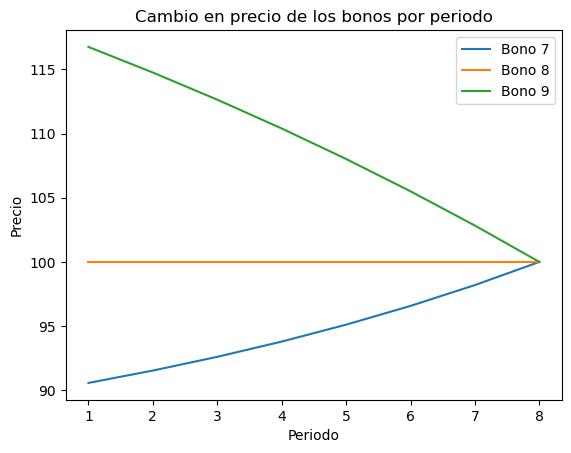

In [71]:
plt.plot(bonos["Periodo"],bonos["Bono 7"])
plt.plot(bonos["Periodo"],bonos["Bono 8"])
plt.plot(bonos["Periodo"],bonos["Bono 9"])

plt.title("Cambio en precio de los bonos por periodo")
plt.xlabel("Periodo")
plt.ylabel("Precio")
plt.legend(["Bono 7","Bono 8","Bono 9"])

In [93]:
#¿Cuál es el precio de un bono corporativo con valor nominal de $100 que promete pagar intereses del 
#10% capitalizable bimestralmente durante 20 años, con una YTM del 12% capitalizable bimestralmente? 
precio_bono(100,.1,6,20,.12,6)

84.88153716579873

In [95]:
#¿Cuál es el precio de un bono corporativo con valor nominal de $100 que promete pagar intereses del 
#5% capitalizable bimestralmente durante 20 años, con una YTM del 7% capitalizable semestralmente? 
precio_bono(100,.05,6,20,.07,2)

79.26302245588073

In [97]:
#¿Cuál es el precio de un bono corporativo con valor nominal de $100 que promete pagar intereses del 
#5% capitalizable bimestralmente durante 5 años, con una YTM del 7% capitalizable semestralmente? 
precio_bono(100,.05,6,5,.07,2)



In [99]:
#¿Cuál es el precio de un bono que paga cupones del 5.5% capitalizable cada 182 días emitido el 
#1 de agosto del 2023 y con madurez del 28 de julio del 2026, con una YTM de 8%? 
#Usar la convención de act/360. 
precio_bono(100,.055,360/182,1077/360,.08,1)

93.8474114000718

In [105]:
precio_bono_act(100,.055,182,1077,.08,1,360)

93.8474114000718

In [53]:
h=[35, -35, 200, -200]

In [ ]:
#De los bonos calculados en las preguntas 7,8,10,11,12 y 13 

# a.	Calcula la duración modificada, convexidad e interpreta los resultados comparando los 6 bonos.
# b.	Aproxima el nuevo precio, cambio en pesos y cambio porcentual dado un cambio de 35 pb en el YTM usando solo la DM.
# c.	Aproxima el nuevo precio, cambio en pesos y cambio porcentual dado un cambio de 200 pb en el YTM usando solo la DM.
# d.	Aproxima el nuevo precio, cambio en pesos y cambio porcentual dado un cambio de 200 pb en el YTM usando la DM y la convexidad.
# e.	¿Llegas a lo mismo en el inciso c y d? Argumenta las razones por lo cual llegas o no al mismo resultado, puedes apoyarte graficando los bonos con distintos ytm’s.


In [70]:
# Nominal
# c tasa cupón
# m capitalización de la tasa
# n años
# r tasa YTM
# l cada cuando nos hacen los pagos
# h cambios en los pbs
bono7 = DM_Conv(100,.09,1,8, 0.09,1, h, 8)

El precio del bono 8 es de 99.99999999999996
La DM del bono 8 es de 5.534819114747018
La convexidad del bono 8 es de 41.14215285814687

Utilizando solo DM
El cambio por 35 pb en pesos del bono 8 es $-1.9371866901614554
El cambio porcentual por 35 pb del bono 8 es -1.93719%
El nuevo precio aproximado por 35 pb del bono 8 es $98.0628133098385

Utilizando la DM y la convexidad
El cambio por 35 pb en pesos del bono 8 es $-1.9119871215358404
El cambio porcentual por 35 pb del bono 8 es -1.91199%
El nuevo precio aproximado por 35 pb del bono 8 es $98.08801287846411
La diferencia de precios es de -1.9119871215358444

Utilizando solo DM
El cambio por -35 pb en pesos del bono 8 es $1.9371866901614554
El cambio porcentual por -35 pb del bono 8 es 1.93719%
El nuevo precio aproximado por -35 pb del bono 8 es $101.93718669016141

Utilizando la DM y la convexidad
El cambio por -35 pb en pesos del bono 8 es $1.9623862587870704
El cambio porcentual por -35 pb del bono 8 es 1.96239%
El nuevo precio apr

In [ ]:
#BONO 8
bono8 = DM_Conv(100,.09,4,5,.14,2,100)

In [90]:
def precios_bonos_var(ytms, bonos_info):
    """
    Calcula los precios de los bonos y su variación porcentual respecto a un YTM de referencia.
    
    Parámetros:
    ytms : array-like
        Lista de tasas de rendimiento (YTM) a evaluar.
    bonos_info : list of tuples
        Lista de bonos con formato [(valor_nominal, cupón, años, pagos_anuales)].
    
    Retorna:
    pd.DataFrame
        DataFrame con las columnas YTM, precios de los bonos y variaciones porcentuales.
    """
    
    # Calcular precios de referencia para YTM = 0.09 y almacenarlos
    precios_referencia = [precio_bono(vn, c, n, f, 0.09, m) for vn, c, n, f, m in bonos_info]
    
    # Calcular los precios y las variaciones porcentuales para cada YTM
    datos = [
        (ytm,) + tuple(valor for (vn, c, n, f, m), ref in zip(bonos_info, precios_referencia)
                       for valor in (precio_bono(vn, c, n, f, ytm, m), precio_bono(vn, c, n, f, ytm, m) / ref - 1))
        for ytm in ytms
    ]
    
    # Construcción dinámica de los nombres de las columnas
    columnas = ["YTM"] + [
        f"Bono{i+1}" if j % 2 == 0 else f"Variación{i+1}"
        for i in range(len(bonos_info))
        for j in range(2)
    ]
    
    return pd.DataFrame(datos, columns=columnas)


#N nominal
#c tasa cupón
#n madurez
#m capitalización YTM
#r YTM
#l capitalización tasa c

#P>N. c>r  Sobre par
#P<N. c<r  Bajo par
#P=N. c=r  A la par

#def precio_bono(N,c,l,n,r,m)


In [96]:
# precio_bono(N,c,l,n,r,m)
#N nominal
#c tasa cupón
#n madurez
#m capitalización YTM
#r YTM
#l capitalización tasa c

bonos_info = [
    (100, 0.09, 1, 8, 1),
    (100, 0.09, 1, 8, 1),
    (100, 0.09, 1, 8, 1),
    (100, 0.10, 6, 20, 6),
    (100, 0.05, 6, 20, 6),
    (100, 0.05, 6, 5, 2),
]

# Rango de YTM
ytms = np.arange(0.01, 0.5, 0.001)

# Llamada a la función
BONO = precios_bonos_var(ytms, bonos_info)
BONO.columns =["YTM","Bono7","Variación7","Bono8","Variación8","Bono9","Variación9","Bono11","Variación11","Bono12","Variación12","Bono13","Variación13"]
BONO

,YTM,Bono7,Variación7,Bono8,Variación8,Bono9,Variación9,Bono11,Variación11,Bono12,Variación12,Bono13,Variación13
0,0.010,161.213422,0.612134,161.213422,0.612134,161.213422,0.612134,263.019639,1.407508,172.453173,1.737307,119.501526,0.414750
1,0.011,160.182928,0.601829,160.182928,0.601829,160.182928,0.601829,259.649448,1.376660,169.958747,1.697714,118.967240,0.408425
2,0.012,159.160861,0.591609,159.160861,0.591609,159.160861,0.591609,256.334623,1.346318,167.508133,1.658816,118.436126,0.402137
3,0.013,158.147143,0.581471,158.147143,0.581471,158.147143,0.581471,253.074169,1.316474,165.100509,1.620600,117.907634,0.395880
4,0.014,157.141694,0.571417,157.141694,0.571417,157.141694,0.571417,249.867109,1.287119,162.735069,1.583054,117.382275,0.389661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.495,21.460659,-0.785393,21.460659,-0.785393,21.460659,-0.785393,20.207917,-0.815030,10.107654,-0.839564,20.654672,-0.755474
486,0.496,21.407970,-0.785920,21.407970,-0.785920,21.407970,-0.785920,20.167082,-0.815404,10.087169,-0.839889,20.597413,-0.756152
487,0.497,21.355512,-0.786445,21.355512,-0.786445,21.355512,-0.786445,20.126413,-0.815776,10.066768,-0.840213,20.540367,-0.756828
488,0.498,21.303284,-0.786967,21.303284,-0.786967,21.303284,-0.786967,20.085909,-0.816147,10.046450,-0.840535,20.483596,-0.757500


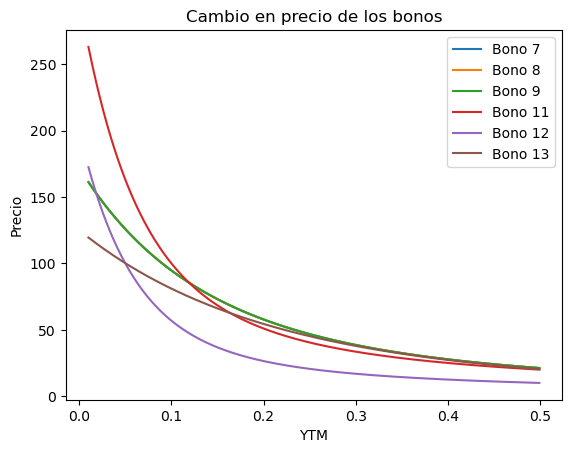

In [101]:
import matplotlib.pyplot as plt
plt.plot(BONO["YTM"],BONO["Bono7"])
plt.plot(BONO["YTM"],BONO["Bono8"])
plt.plot(BONO["YTM"],BONO["Bono9"])
plt.plot(BONO["YTM"],BONO["Bono11"])
plt.plot(BONO["YTM"],BONO["Bono12"])
plt.plot(BONO["YTM"],BONO["Bono13"])

plt.title("Cambio en precio de los bonos")
plt.xlabel("YTM")
plt.ylabel("Precio")
plt.legend(["Bono 7","Bono 8","Bono 9","Bono 11","Bono 12","Bono 13"])

In [109]:
áreacuadrado(l):
    a=l**2
    return a

In [9]:
print("¿De qué figura quieres sacar su área:cuadrado, rectángulo,círculo, triángulo?")
i=input()

if i=="cuadrado":
    print("Dame el largo de un lado del cuadrado en cm")
    l=float(input())
    a=l**(2)
    print(f"El área del cuadrado es de {a} en cm cuadrados")
    
elif i=="rectángulo":
    print("Dame el largo del rectángulo en cm")
    l=float(input())
    print("Dame el ancho del rectángulo en cm")
    m=float(input())
    a=l*m
    print(f"El área del rectángulo es de {a} en cm cuadrados")
    
elif i=="triangulo":
    print("Dame la base del triángulo en cm")
    l=float(input())
    print("Dame altura del triángulo en cm")
    m=float(input())
    a=(l*m)/2
    print(f"El área del triángulo es de {a} en cm cuadrados")
    
elif i=="círculo":
    print("Dame el radio del círculo en cm")
    l=float(input())
    a=math.pi*(l**2)
    print(f"El área del círculo es de {a} en cm cuadrados")
    
else: print("Esa figura no es válida")

¿De qué figura quieres sacar su área:cuadrado, rectángulo,círculo, triángulo?


 rombo


Esa figura no es válida


In [78]:
#N nominal
#c tasa cupón
#m capitalización YTM
#n madurez
#r YTM
#l capitalización tasa cupón
# h cambios en los pbs (es un vector)

#DM_Conv(N,c,m,n,r,l,h, bono_num=7)
h = [250, -70]
bono1 = DM_Conv(100, 0.11, 2, 10, 0.12, 4, h, 1)
print()
bono2 = DM_Conv(100, 0.14, 2, 3, 0.11, 2, h, 2)
print()
bono3 = DM_Conv(100, 0.13, 2, 8, 0.13, 2, h, 3)
print()
bono4 = DM_Conv(100, 0.14, 2, 10, 0.15, 4, h, 4)

El precio del bono 1 es de 95.19755607993451
La DM del bono 1 es de 5.908713413843804
La convexidad del bono 1 es de 48.33907742232545

Utilizando solo DM
El cambio por 250 pb en pesos del bono 1 es $-14.062376914366421
El cambio porcentual por 250 pb del bono 1 es -14.77178%
El nuevo precio aproximado por 250 pb del bono 1 es $81.1351791655681

Utilizando la DM y la convexidad
El cambio por 250 pb en pesos del bono 1 es $-12.624326278815133
El cambio porcentual por 250 pb del bono 1 es -13.26119%
El nuevo precio aproximado por 250 pb del bono 1 es $82.57322980111938
La diferencia de precios es de -12.624326278815133

Utilizando solo DM
El cambio por -70 pb en pesos del bono 1 es $3.9374655360225983
El cambio porcentual por -70 pb del bono 1 es 4.13610%
El nuevo precio aproximado por -70 pb del bono 1 es $99.13502161595711

Utilizando la DM y la convexidad
El cambio por -70 pb en pesos del bono 1 es $4.050208705849819
El cambio porcentual por -70 pb del bono 1 es 4.25453%
El nuevo prec

### Duración modificada y convexidad conjunta de los bonos


In [72]:
#Duración modificada y convexidad conjunta de los bonos

print("¿Cuántos bonos pondrás en el portafolio?")
a=float(input())

if a==2:
    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    P=n1*P1+n2*P2
    c1=n1*P1/P
    c2=n2*P2/P
    DMP=c1*DM1+c2*DM2
    ConvP=c1*Conv1+c2*Conv2
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")
    
elif a==3:

    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    
    print("Dame el número del tercer bono a utilizar")
    n3=float(input())
    print("Dame el precio del tercer bono")
    P3=float(input())
    print("Dame la DM del tercer bono")
    DM3=float(input())
    print("Dame la convexidad del tercer bono")
    Conv3=float(input())

    
    P=n1*P1+n2*P2+n3*P3
    c1=n1*P1/P
    c2=n2*P2/P
    c3=n3*P3/P
    DMP=c1*DM1+c2*DM2+c3*DM3
    ConvP=c1*Conv1+c2*Conv2+c3*Conv3
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")
    
elif a==4:


    print("Dame el número del primer bono a utilizar")
    n1=float(input())
    print("Dame el precio del primer bono")
    P1=float(input())
    print("Dame la DM del primer bono")
    DM1=float(input())
    print("Dame la convexidad del primer bono")
    Conv1=float(input())

    print("Dame el número del segundo bono a utilizar")
    n2=float(input())
    print("Dame el precio del segundo bono")
    P2=float(input())
    print("Dame la DM del segundo bono")
    DM2=float(input())
    print("Dame la convexidad del segundo bono")
    Conv2=float(input())
    
    print("Dame el número del tercer bono a utilizar")
    n3=float(input())
    print("Dame el precio del tercer bono")
    P3=float(input())
    print("Dame la DM del tercer bono")
    DM3=float(input())
    print("Dame la convexidad del tercer bono")
    Conv3=float(input())

    print("Dame el número del cuarto bono a utilizar")
    n4=float(input())
    print("Dame el precio del cuarto bono")
    P4=float(input())
    print("Dame la DM del cuarto bono")
    DM4=float(input())
    print("Dame la convexidad del cuarto bono")
    Conv4=float(input())

    P=n1*P1+n2*P2+n3*P3+n4*P4
    c1=n1*P1/P
    c2=n2*P2/P
    c3=n3*P3/P
    c4=n4*P4/P
    DMP=c1*DM1+c2*DM2+c3*DM3+c4*DM4
    ConvP=c1*Conv1+c2*Conv2+c3*Conv3+c4*Conv4
    print()
    print(f"El precio del portafolio es {P}")
    print(f"La DM conjunta de los bonos es de {DMP}")
    print(f"La convexidad conjunta de los bonos es de {ConvP}")

¿Cuántos bonos pondrás en el portafolio?


 4


Dame el número del primer bono a utilizar


 12


Dame el precio del primer bono


 95.19755607993451


Dame la DM del primer bono


 5.908713413843804


Dame la convexidad del primer bono


 48.33907742232545


Dame el número del segundo bono a utilizar


 15


Dame el precio del segundo bono


 107.49329546296555


Dame la DM del segundo bono


 2.434129052975975


Dame la convexidad del segundo bono


 7.638333249748095


Dame el número del tercer bono a utilizar


 16


Dame el precio del tercer bono


 100.0


Dame la DM del tercer bono


 4.883882091424958


Dame la convexidad del tercer bono


 32.944338063554056


Dame el número del cuarto bono a utilizar


 18


Dame el precio del cuarto bono


 96.21672879116775


Dame la DM del cuarto bono


 5.245005597454251


Dame la convexidad del cuarto bono


 40.332006144329874



El precio del portafolio es 6086.671223144716
La DM conjunta de los bonos es de 4.530024806012049
La convexidad conjunta de los bonos es de 31.232042782130936


#### Ejercicio 5
Elige el bono más volátil, di la razón y compara con los otros 3.

En los bonos hay más variación por la tasa y por el tiempo de madurez, a menor tasa cupón y mayor madurez más volátil es el bono.
El bono 1 es el más volátil, ya que su tasa cupón es la más baja de entre los 4 y su madurez es la más alta, al igual que el 4, pero el 4 tiene una tasa cupón más alta. Además, entre mayor DM hay más cambio en el precio y esto afirma que el bono 1 es el más volátil, pues es el que su DM es mayor. Si observamos los bonos 2 y 3 su madurez es menor que las del bono 1 y 4, su tasa cupón es más alta y de igual forma su DM es menor que la de los bonos 1 y 4. Y podemos decir que el bono 2 será el menos volátil pues es el de menor madurez y mayor tasa cupón.

### Inmunización con un bono


In [74]:
print("¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?")
i=float(input())
print("Dame el precio del portafolio a inmunizar")
P=float(input())
print("Dame la DM del portafolio a inmunizar")
DMp=float(input())
print("Dame la Convexidad del portafolio a inmunizar")
Convp=float(input())
print("Dame el cambio de pb")
h=float(input())

G=-P*(h/10000)*DMp+((h/10000)**2/2)*P*Convp


if      i==1: 
        print("Dame el precio del intrumento ")
        Q1=float(input())
        print("Dame la DM del instrumento")
        DMq1=float(input())
        phi_1=(-DMp*P)/(DMq1*Q1)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {-P*(h/10000)*DMp}")
        print()
        print(f"El número del instrumento que necesitas para cubrir el cambio es de {phi_1}")
        print()
        print(f"La ganancia es de {-h/10000*Q1*DMq1}")
        print(f"Si utilizamos {phi_1} del intrumento al multiplicarla por la ganancia nos da {phi_1*(-h/10000*Q1*DMq1)}")
        
elif    i==2: 
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2],[Convq1*Q1,Convq2*Q2],])
        B=[[-DMp*P],[-Convp*P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1}")
        
        
elif    i==3:
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio del tercer intrumento ")
        Q3=float(input())
        print("Dame la DM del tercer instrumento")
        DMq3=float(input())
        print("Dame la Convexidad del tercer instrumento")
        Convq3=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        print("Dame el precio nuevo con los pb del tercer instrumento")
        l3=float(input())
        L3=l3-Q3
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2,DMq3*Q3],[Convq1*Q1,Convq2*Q2,Convq3*Q3],[Q1,Q2,Q3]])
        B=[[-DMp*P],[-Convp*P],[-P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print(f"Número del tercer instrumento que necesitas para cubrir el cambio es de {phi_s[2,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"Si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print(f"Si utilizamos {phi_s[2,0]} del tercer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[2,0]*L3}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1+phi_s[2,0]*L3}")
else:
    print("Revisa que hayas escrito bien")
     

¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?


 1


Dame el precio del portafolio a inmunizar


 95.19755607993451


Dame la DM del portafolio a inmunizar


 5.908713413843804


Dame la Convexidad del portafolio a inmunizar


 48.33907742232545


Dame el cambio de pb


 10


Dame el precio del intrumento 


 107.49329546296555


Dame la DM del instrumento


 2.434129052975975



Si tenemos un cambio de 10.0pb perderíamos -0.5624950765746569

El número del instrumento que necesitas para cubrir el cambio es de -2.149778662884724

La ganancia es de -0.26165255348653504
Si utilizamos -2.149778662884724 del intrumento al multiplicarla por la ganancia nos da 0.562495076574657


In [76]:
-2.149778662884724*(-0.26165255348653504)

0.562495076574657

### Imnunización con 3 bonos

In [79]:
print("¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?")
i=float(input())
print("Dame el precio del portafolio a inmunizar")
P=float(input())
print("Dame la DM del portafolio a inmunizar")
DMp=float(input())
print("Dame la Convexidad del portafolio a inmunizar")
Convp=float(input())
print("Dame el cambio de pb")
h=float(input())

G=-P*(h/10000)*DMp+((h/10000)**2/2)*P*Convp


if      i==1: 
        print("Dame el precio del intrumento ")
        Q1=float(input())
        print("Dame la DM del instrumento")
        DMq1=float(input())
        phi_1=(-DMp*P)/(DMq1*Q1)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {-P*(h/10000)*DMp}")
        print()
        print(f"El número del instrumento que necesitas para cubrir el cambio es de {phi_1}")
        print()
        print(f"La ganancia es de {-h/10000*Q1*DMq1}")
        print(f"Si utilizamos {phi_1} del intrumento al multiplicarla por la ganancia nos da {phi_1*(-h/10000*Q1*DMq1)}")
        
elif    i==2: 
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2],[Convq1*Q1,Convq2*Q2],])
        B=[[-DMp*P],[-Convp*P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1}")
        
        
elif    i==3:
        print("Dame el precio del primer intrumento ")
        Q1=float(input())
        print("Dame la DM del primer instrumento")
        DMq1=float(input())
        print("Dame la Convexidad del primer instrumento")
        Convq1=float(input())
        print("Dame el precio del segundo intrumento ")
        Q2=float(input())
        print("Dame la DM del segundo instrumento")
        DMq2=float(input())
        print("Dame la Convexidad del segundo instrumento")
        Convq2=float(input())
        print("Dame el precio del tercer intrumento ")
        Q3=float(input())
        print("Dame la DM del tercer instrumento")
        DMq3=float(input())
        print("Dame la Convexidad del tercer instrumento")
        Convq3=float(input())
        print("Dame el precio nuevo con los pb del primer instrumento")
        l1=float(input())
        L1=l1-Q1
        print("Dame el precio nuevo con los pb del segundo instrumento")
        l2=float(input())
        L2=l2-Q2
        print("Dame el precio nuevo con los pb del tercer instrumento")
        l3=float(input())
        L3=l3-Q3
        A=np.linalg.inv([[DMq1*Q1,DMq2*Q2,DMq3*Q3],[Convq1*Q1,Convq2*Q2,Convq3*Q3],[Q1,Q2,Q3]])
        B=[[-DMp*P],[-Convp*P],[-P]]
        phi_s=np.dot(A,B)
        print()
        print(f"Si tenemos un cambio de {h}pb perderíamos {G}")
        print()
        print(f"Número del primer instrumento que necesitas para cubrir el cambio es de {phi_s[0,0]}")
        print(f"Número del segundo instrumento que necesitas para cubrir el cambio es de {phi_s[1,0]}")
        print(f"Número del tercer instrumento que necesitas para cubrir el cambio es de {phi_s[2,0]}")
        print()
        print(f"Si utilizamos {phi_s[0,0]} del primer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[0,0]*L1}")
        print(f"Si utilizamos {phi_s[1,0]} del segundo intrumento al multiplicarla por la diferencia de precios nos da {phi_s[1,0]*L2}")
        print(f"Si utilizamos {phi_s[2,0]} del tercer intrumento al multiplicarla por la diferencia de precios nos da {phi_s[2,0]*L3}")
        print()
        print(f"Sumando las cantidades anteriores nos queda {phi_s[1,0]*L2+phi_s[0,0]*L1+phi_s[2,0]*L3}")
else:
    print("Revisa que hayas escrito bien")
     

¿Cuántos instrumentos o portafolios vas a ocupar para la inmunización?


 3


Dame el precio del portafolio a inmunizar


 95.19755607993451


Dame la DM del portafolio a inmunizar


 5.908713413843804


Dame la Convexidad del portafolio a inmunizar


 48.33907742232545


Dame el cambio de pb


 -70


Dame el precio del primer intrumento 


 107.49329546296555


Dame la DM del primer instrumento


 2.434129052975975


Dame la Convexidad del primer instrumento


 7.638333249748095


Dame el precio del segundo intrumento 


 100.0


Dame la DM del segundo instrumento


 4.883882091424958


Dame la Convexidad del segundo instrumento


 32.944338063554056


Dame el precio del tercer intrumento 


 96.21672879116775


Dame la DM del tercer instrumento


 5.245005597454251


Dame la Convexidad del tercer instrumento


 40.332006144329874


Dame el precio nuevo con los pb del primer instrumento


 109.34497954288636


Dame el precio nuevo con los pb del segundo instrumento


 103.49943109225318


Dame el precio nuevo con los pb del tercer instrumento


 99.84440479428807



Si tenemos un cambio de -70.0pb perderíamos 4.050208705849819

Número del primer instrumento que necesitas para cubrir el cambio es de 0.19885323810259425
Número del segundo instrumento que necesitas para cubrir el cambio es de 0.08583711624922508
Número del tercer instrumento que necesitas para cubrir el cambio es de -1.300778556436165

Si utilizamos 0.19885323810259425 del primer intrumento al multiplicarla por la diferencia de precios nos da 0.3682133752352771
Si utilizamos 0.08583711624922508 del segundo intrumento al multiplicarla por la diferencia de precios nos da 0.30038107347188847
Si utilizamos -1.300778556436165 del tercer intrumento al multiplicarla por la diferencia de precios nos da -4.718803154556959

Sumando las cantidades anteriores nos queda -4.050208705849793


In [82]:
0.3682133752352771+0.30038107347188847-4.718803154556959


-4.050208705849793

In [87]:
# Bono 2
# (Precio nuevo con cambio en pb - Precio original)*phi
(109.34497954288636-107.49329546296555)*0.19885323810259425

0.3682133752352771

In [85]:
# Bono 3
# (Precio nuevo con cambio en pb - Precio original)*phi
(103.49943109225318-100.0)*0.08583711624922508

0.30038107347188847

In [88]:
# Tiempo de un CETE
#P precio
#N nominal
#r YTM anual
#t_cete(P,N,r):

t_cete(9.464,10,0.112)

182.04323149378095